<a href="https://colab.research.google.com/github/prajwalDU/Bike_Sharing_Demand_Prediction_Capstone_Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/almabetter/ML/SeoulBikeData.csv', encoding = 'unicode_escape')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [8]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [10]:
data['WeekDay'] = data['Date'].dt.day_name()

In [11]:
data['Month'] = data['Date'].dt.month

In [12]:
mapping_dictday = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

data['WeekDay Encoding'] = data['WeekDay'].map(mapping_dictday)

In [13]:
data['label_day_night'] = data['Hour'].apply(lambda x : 'Night' if (x > 20 or x < 5) else('Day'))

In [14]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,WeekDay Encoding,label_day_night
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,5,Night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,5,Night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,5,Night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,5,Night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,5,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,Day
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,Day
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,Night
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,Night


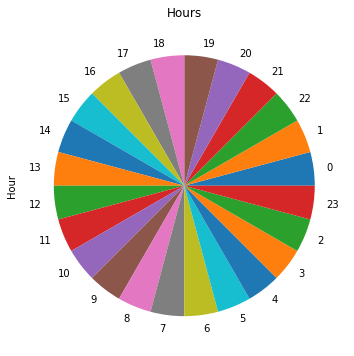

In [15]:
plt.figure(figsize=(9,6))
plt.title('Hours')
data['Hour'].value_counts().plot(kind='pie')
plt.show()

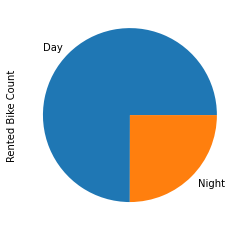

In [16]:
data.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

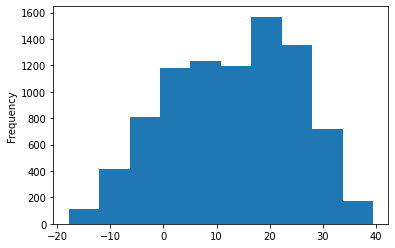

In [17]:
data['Temperature(°C)'].plot(kind='hist')
plt.show()

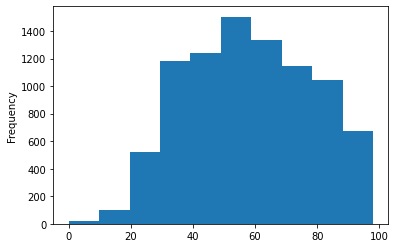

In [18]:
data['Humidity(%)'].plot(kind='hist')
plt.show()

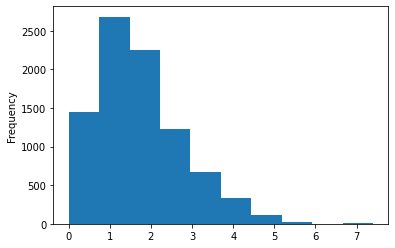

In [19]:
data['Wind speed (m/s)'].plot(kind='hist')
plt.show()

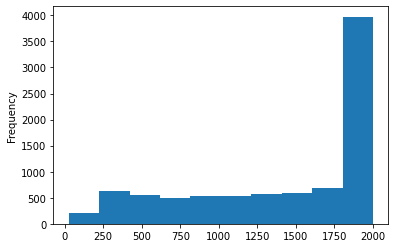

In [20]:
data['Visibility (10m)'].plot(kind='hist')
plt.show()

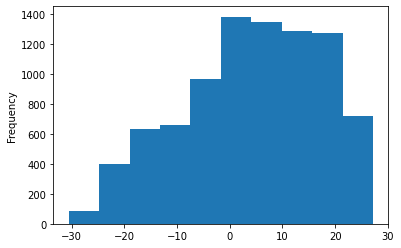

In [21]:
data['Dew point temperature(°C)'].plot(kind='hist')
plt.show()

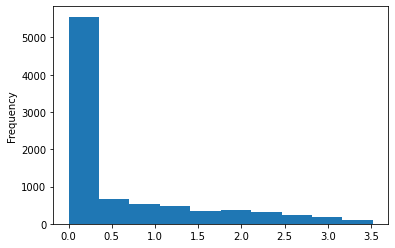

In [22]:
data['Solar Radiation (MJ/m2)'].plot(kind='hist')
plt.show()

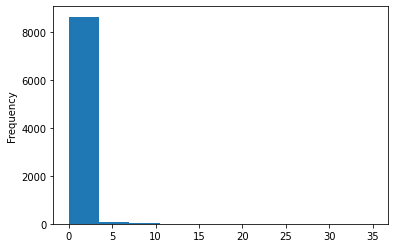

In [23]:
data['Rainfall(mm)'].plot(kind='hist')
plt.show()

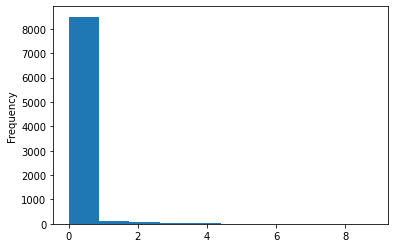

In [24]:
data['Snowfall (cm)'].plot(kind='hist')
plt.show()

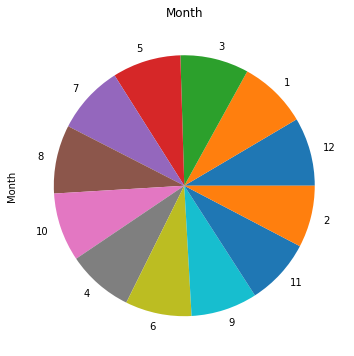

In [25]:
plt.figure(figsize=(9,6))
plt.title('Month')
data['Month'].value_counts().plot(kind='pie')
plt.show()

In [26]:
data1VizSolarRadiation=pd.DataFrame(data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
data1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


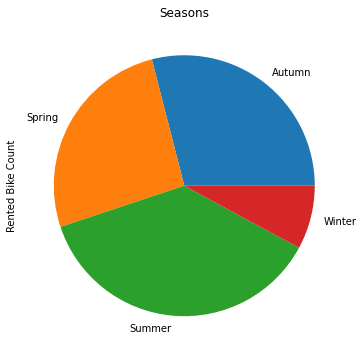

In [27]:
plt.figure(figsize=(9,6))
plt.title('Seasons')
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()
plt.show()

In [28]:
data.skew().sort_values(ascending=True)

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
WeekDay Encoding             -0.003771
Hour                          0.000000
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [29]:
data1vizdays = pd.DataFrame(data.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
data1vizdays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


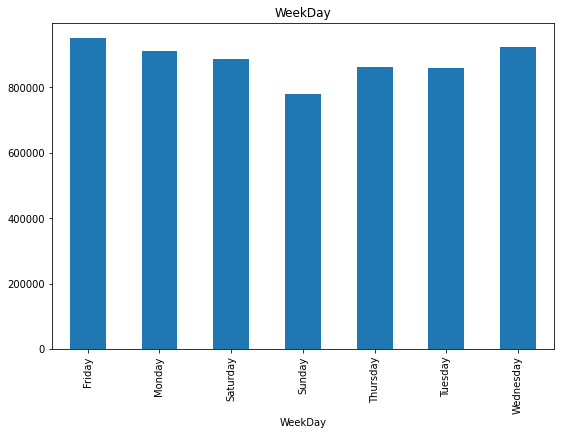

In [30]:
plt.figure(figsize=(9,6))
plt.title('WeekDay')
data.groupby('WeekDay').sum()['Rented Bike Count'].plot.bar()
plt.show()

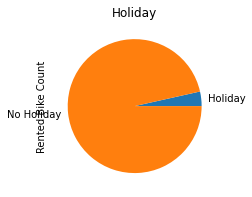

In [31]:
plt.figure(figsize=(3,4))
plt.title('Holiday')
data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie()
plt.show()

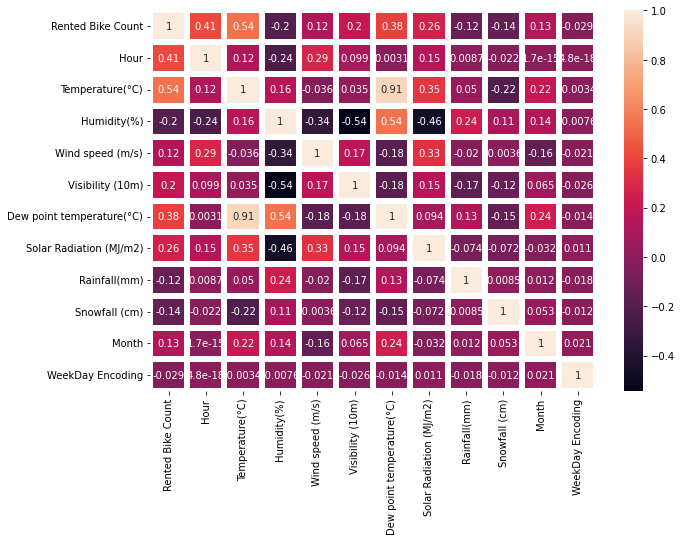

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, linewidth=5)

In [33]:
dataHoliday=data.loc[data['Holiday'] == 'Holiday']

In [34]:
dataHoliday.shape

(432, 18)

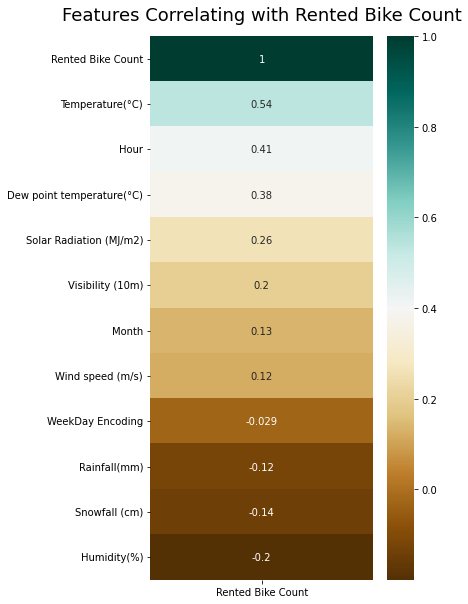

In [35]:
corelation = data.corr()
plt.figure(figsize=(5,10))
plot = sns.heatmap(corelation[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), annot=True, cmap='BrBG')
plot.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

In [36]:
from sklearn import preprocessing
from sklearn import linear_model 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
reporting = {}

In [38]:
x = data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'], axis=1)
y = data.iloc[:,1]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.27, random_state=0) 

In [40]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [41]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6394, 11) (6394,)
(2366, 11) (2366,)


In [42]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [43]:
lr_model.intercept_

-51.90265940139636

In [44]:
lr_model.coef_

array([  625.57887848,  1400.20173014,  -916.30774436,    83.87807052,
          23.70942292,   398.51676136,  -274.98320042, -1971.93699327,
         104.2235693 ,    83.07290849,   -44.14619546])

In [45]:
train_class_pred = lr_model.predict(x_train)
test_class_pred = lr_model.predict(x_test)

In [46]:
len(train_class_pred)

6394

In [47]:
len(test_class_pred)

2366

In [48]:
train_class_pred

array([1235.93836629,  627.24130607, 1044.17466455, ...,  911.87893844,
        318.86765513,  583.21570324])

In [49]:
test_class_pred

array([ 328.2804943 ,  632.84120193,  621.80481144, ..., -142.55961312,
          2.48048092, -159.56195931])

In [50]:
mean_squared_error(y_test, test_class_pred)

222611.76779346197

In [51]:
from numpy import math
math.sqrt(mean_squared_error(y_train, train_class_pred))

467.0017899569498

In [52]:
math.sqrt(mean_squared_error(y_test, test_class_pred))

471.8175153525587

In [53]:
r2_score(y_train, train_class_pred)

0.4755956815271155

In [54]:
r2_score(y_test, test_class_pred)

0.4649275989611815

# Ridge


In [55]:
x_ridgerig = data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'], axis=1)
y_ridgerig = data.iloc[:,1]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_ridgerig, y_ridgerig, test_size = 0.27, random_state = 0)

Let's test the values of the Ridge in function of the alpha value The R2 test highest value is 0.47, which is the same result as we had in the Linear Regression

In [57]:
errors = []
coefs = []
alphas = [-2000,-1000, 0, 10, 20, 50, 6000, 1000000]

for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(x_train, y_train)
    r2_train = linridge.score(x_train, y_train)
    r2_test = linridge.score(x_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(x_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -2000.00
 R2 training: 0.03, R2 test: 0.03

Alpha = -1000.00
 R2 training: 0.45, R2 test: 0.45

Alpha = 0.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 10.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 20.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 50.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 6000.00
 R2 training: 0.47, R2 test: 0.46

Alpha = 1000000.00
 R2 training: 0.36, R2 test: 0.34



Grid Search on Ridge, we find the same result as the previous test

In [58]:
ridge = Ridge()
parameters = {'alpha':list(range(-300,300))}

gridsearchcv = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
gridsearchcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [59]:
gridsearchcv.best_estimator_

Ridge(alpha=25)

In [60]:
best_score = gridsearchcv.score(x_train, y_train)
best_score

0.47559488165929953

In [61]:
y_pred_r = gridsearchcv.predict(x_test)

In [62]:
mean_squared_error(y_test, y_pred_r)

222620.0724352018

In [63]:
math.sqrt(mean_squared_error(y_test, y_pred_r))

471.8263159629842

In [64]:
r2_score(y_test, y_pred_r)

0.4649076378214829

In [65]:
reporting['Ridge regression']=best_score

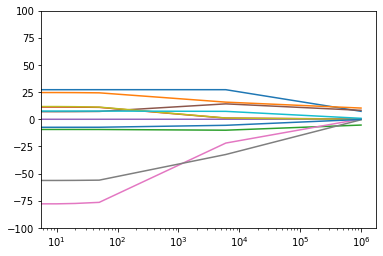

In [66]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

## Lasso

In [78]:
errors = []
cofes = []
alphas = [-60, 0, 10, 20, 50, 6000, 1000000]

for alpha in alphas:
  linlasso = Lasso(alpha=alpha).fit(x_train,y_train)
  r2_train = linlasso.score(x_train,y_train)
  r2_test = linlasso.score(x_test,y_test)
  coefs.append(linlasso.coef_)
  errors.append(np.mean((linlasso.predict(x_test)-y_test)**2))
  print('Alpha = {:.2f}\n \
Laaso R2 Training : {:.2f}, R2 Test : {:.2f}\n'
        .format(alpha, r2_train, r2_test))

Alpha = -60.00
 Laaso R2 Training : 0.32, R2 Test : 0.31

Alpha = 0.00
 Laaso R2 Training : 0.48, R2 Test : 0.46

Alpha = 10.00
 Laaso R2 Training : 0.47, R2 Test : 0.46

Alpha = 20.00
 Laaso R2 Training : 0.47, R2 Test : 0.46

Alpha = 50.00
 Laaso R2 Training : 0.46, R2 Test : 0.45

Alpha = 6000.00
 Laaso R2 Training : 0.04, R2 Test : 0.04

Alpha = 1000000.00
 Laaso R2 Training : 0.00, R2 Test : -0.00



In [68]:
lasso = Lasso()
parameters = {'alpha':list(range(-300,300))}

gridsearchlasso = GridSearchCV(lasso, parameters, scoring='r2', cv=4)
gridsearchlasso.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [69]:
gridsearchlasso.best_estimator_

Lasso(alpha=0)

In [70]:
best_score_lasso = gridsearchlasso.score(x_train, y_train)
best_score_lasso

0.4755956815245487

In [71]:
y_pred_lasso = gridsearchlasso.predict(x_test)

In [72]:
mean_squared_error(y_test, y_pred_lasso)

222611.74157526955

In [73]:
math.sqrt(mean_squared_error(y_test, y_pred_lasso))

471.817487568307

In [74]:
r2_score(y_test, y_pred_lasso)

0.4649276619795534

In [75]:
reporting['Lasso regression']=best_score_lasso

In [ ]:
ax = plt.gca()
ax.plot(alphas, cofes)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()

# SVR Regression

In [83]:
C = [10,50,80,100, 500,600,800,1000,1400,1800,2200]
for i in C:
  svr_model = SVR(C = i).fit(x_train, y_train)
  r2_train_svr = svr_model.score(x_train, y_train)
  r2_test_svr = svr_model.score(x_test, y_test)
  print('C = {:.2f}\n \
R2 Train SVR: {:.2f}, R2 Test SVR: {:.2f}\n'
        .format(i, r2_train_svr, r2_test_svr))

C = 10.00
 R2 Train SVR: -0.01, R2 Test SVR: -0.00

C = 50.00
 R2 Train SVR: 0.04, R2 Test SVR: 0.04

C = 80.00
 R2 Train SVR: 0.06, R2 Test SVR: 0.06

C = 100.00
 R2 Train SVR: 0.07, R2 Test SVR: 0.08

C = 500.00
 R2 Train SVR: 0.28, R2 Test SVR: 0.27

C = 600.00
 R2 Train SVR: 0.30, R2 Test SVR: 0.30

C = 800.00
 R2 Train SVR: 0.33, R2 Test SVR: 0.33

C = 1000.00
 R2 Train SVR: 0.35, R2 Test SVR: 0.35

C = 1400.00
 R2 Train SVR: 0.37, R2 Test SVR: 0.37

C = 1800.00
 R2 Train SVR: 0.39, R2 Test SVR: 0.38

C = 2200.00
 R2 Train SVR: 0.40, R2 Test SVR: 0.39



In [85]:
svr_model = SVR()
param = {'C' : [800,1000,1400,1800,2200]}

gridsearchSVR = GridSearchCV(svr_model, param, scoring = 'r2', cv = 5)
gridsearchSVR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [800, 1000, 1400, 1800, 2200]}, scoring='r2')

In [87]:
gridsearchSVR.best_estimator_

SVR(C=2200)

In [88]:
best_score_svr = gridsearchSVR.score(x_train, y_train)
best_score_svr

0.39932928812244806

In [93]:
gridsearchSVR.best_score_

0.38665729429000556

In [89]:
y_pred_svr = gridsearchSVR.predict(x_test)

In [90]:
mean_squared_error(y_test, y_pred_svr)

252527.0187056

In [91]:
math.sqrt(mean_squared_error(y_test, y_pred_svr))

502.52066495379074

In [92]:
r2_score(y_test, y_pred_svr)

0.39302293151301926

In [ ]:
reporting['SVR'] = gridsearchSVR.best_score_

## Decision Tree Regressor

We first need to standartize data

In [94]:
scalarTrain = preprocessing.StandardScaler().fit(x_train)
scalarTest = preprocessing.StandardScaler().fit(x_test)
x_train_scaled = scalarTrain.transform(x_train)
x_test_scaled = scalarTest.transform(x_test)

In [95]:
decisiontree = DecisionTreeRegressor()
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridsearch_decisiontree = GridSearchCV(decisiontree, param, scoring='r2', cv=6)
gridsearch_decisiontree.fit(x_train_scaled, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [96]:
gridsearch_decisiontree.best_estimator_

DecisionTreeRegressor(max_depth=8)

In [97]:
best_score_decisiontree = gridsearch_decisiontree.score(x_train_scaled, y_train)
best_score_decisiontree

0.8037203531381983

In [98]:
y_pred_decisiontree = gridsearch_decisiontree.predict(x_test_scaled)

In [99]:
r2_score(y_test, y_pred_decisiontree)

0.717475300108262

In [ ]:
reporting['Decision Tree Regressor'] = best_score_decisiontree

# Random Forest Regressor

In [ ]:
randomforestalgo = RandomForestRegressor()
param = {'n_estimator' : [int(x) for x in np.linspace(start=10, stop=100, num=10)],
         'max_depth' : [60,70,80,90,100],
         'min_samples_split' : [2,4,6,8],
         'min_samples_leaf' : [1,2,3,4],
         'bootstrap' : [True,False]}

gridsearch_randomforest = GridSearchCV(randomforestalgo, param, scoring='r2', cv=5)
gridsearch_randomforest.fit(x_train_scaled, y_train)

this is how we predict the target of one day with its features